# MLP
Cell line 08 NHEK

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1090

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 16:15:42.217255


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=8]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]


2023-04-29 16:15:45.388843
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1208
Num RCI: 1208
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1208 sequences.

Training # 1 1
2023-04-29 16:15:49.420286
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.24128999908414805, -2.967479825563759]
Variances [1.68572508 3.45754449]
Priors [0.6428287 0.3571713]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Train 1:0 661:285 69.87%
Computed class weights: {0: 1.6596491228070176, 1: 0.7155824508320726}
Valid 1:0 187:75 71.37%
FIT


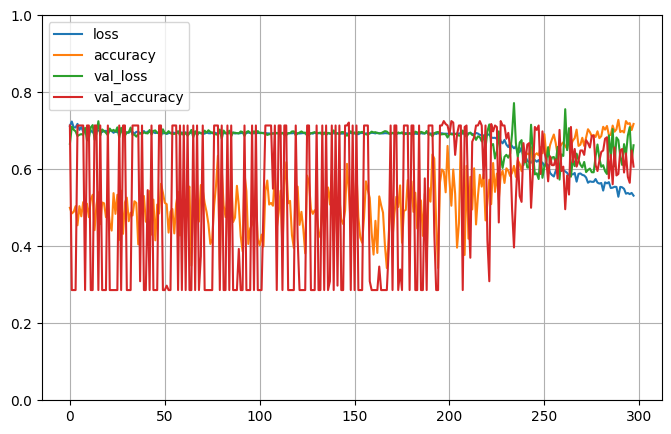


Testing # 1 1
2023-04-29 16:16:47.376810
PREDICT
Test 1:0 187:75 71.37%
Predict 1:0 259:3 98.85%
Test sizes (262, 1025) (262,)
Distrib of scores: 0.50152326 mean 0.0009444305 std
Range of scores: 0.49950108 to 0.5050903
Score threshold 0.5
Confusion matrix
 [[  3  72]
 [  0 187]]
Normalized matrix
 [[0.01145038 0.27480916]
 [0.         0.71374046]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


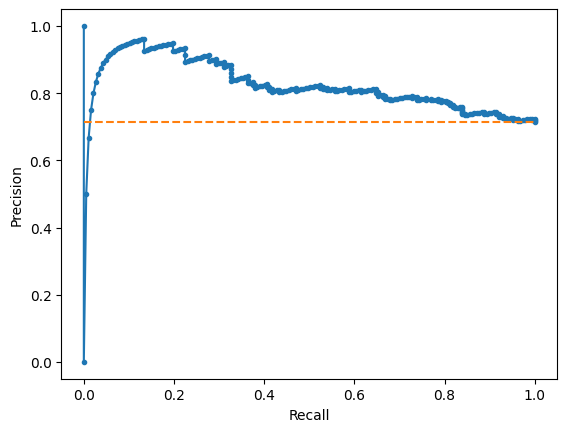

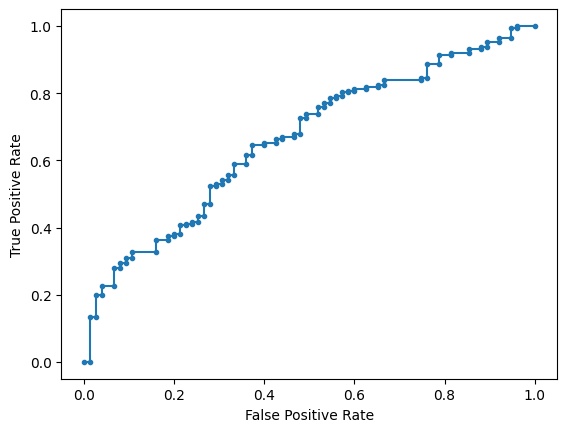

Accuracy: 72.52% Precision: 72.20% Recall: 100.00%
F1: 83.86% MCC: 0.1699
AUPRC: 82.16% AUROC: 66.24%
 accuracy [72.51908396946564]
 precision [72.2007722007722]
 recall [100.0]
 F1 [83.85650224215246]
 MCC [0.16994207507356404]
 AUPRC [82.15554741889402]
 AUROC [66.23885918003565]

Training # 1 2
2023-04-29 16:16:48.007666
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.1818650467974715, -2.8694681008190854]
Variances [1.60656029 3.11579574]
Priors [0.6199807 0.3800193]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 664:311 68.10%
Computed class weights: {0: 1.567524115755627, 1: 0.7341867469879518}
Valid 1:0 165:68 70.82%
FIT


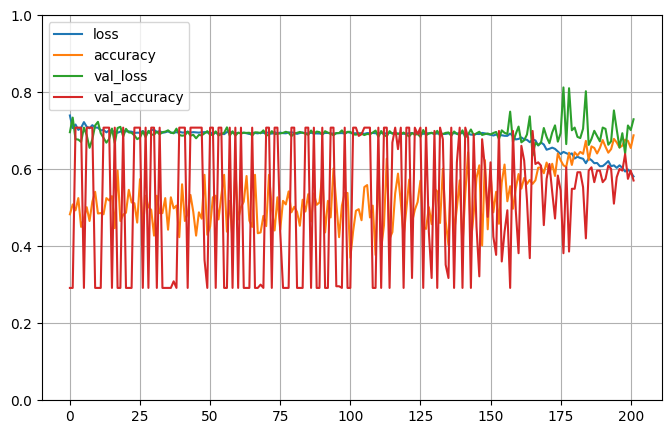


Testing # 1 2
2023-04-29 16:17:29.656877
PREDICT
Test 1:0 165:68 70.82%
Predict 1:0 233:0 100.00%
Test sizes (233, 1025) (233,)
Distrib of scores: 0.50263643 mean 0.00038398968 std
Range of scores: 0.5017087 to 0.50387394
Score threshold 0.5
Confusion matrix
 [[  0  68]
 [  0 165]]
Normalized matrix
 [[0.         0.29184549]
 [0.         0.70815451]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


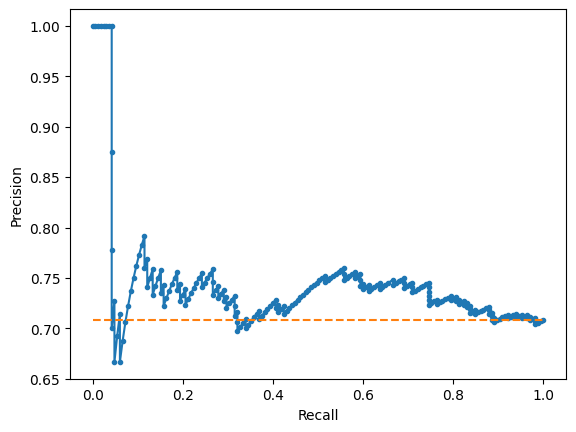

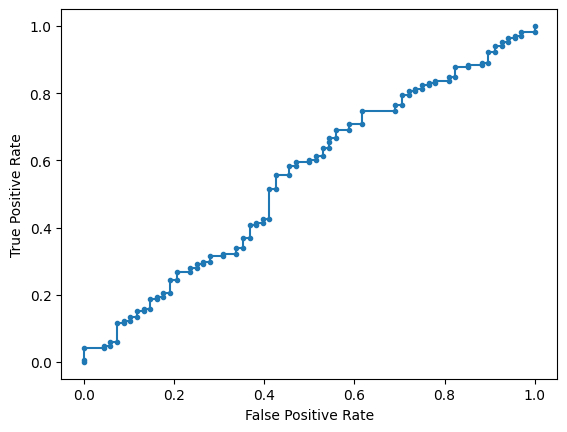

Accuracy: 70.82% Precision: 70.82% Recall: 100.00%
F1: 82.91% MCC: 0.0000
AUPRC: 74.26% AUROC: 54.84%
 accuracy [70.81545064377683]
 precision [70.81545064377683]
 recall [100.0]
 F1 [82.91457286432161]
 MCC [0.0]
 AUPRC [74.25510919651815]
 AUROC [54.839572192513366]

Training # 1 3
2023-04-29 16:17:30.562082
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.23528003396534505, -3.051398822884106]
Variances [1.65535213 3.44498548]
Priors [0.65783197 0.34216803]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Train 1:0 681:281 70.79%
Computed class weights: {0: 1.7117437722419928, 1: 0.7063142437591777}
Valid 1:0 176:70 71.54%
FIT


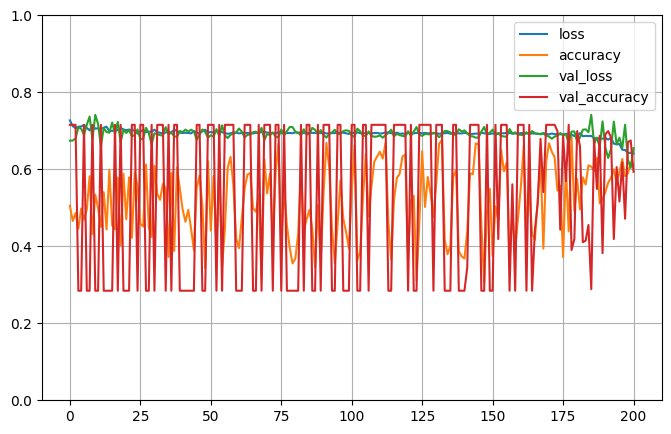


Testing # 1 3
2023-04-29 16:18:12.407446
PREDICT
Test 1:0 176:70 71.54%
Predict 1:0 246:0 100.00%
Test sizes (246, 1025) (246,)
Distrib of scores: 0.50669754 mean 0.00028532668 std
Range of scores: 0.5060944 to 0.5075401
Score threshold 0.5
Confusion matrix
 [[  0  70]
 [  0 176]]
Normalized matrix
 [[0.         0.28455285]
 [0.         0.71544715]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


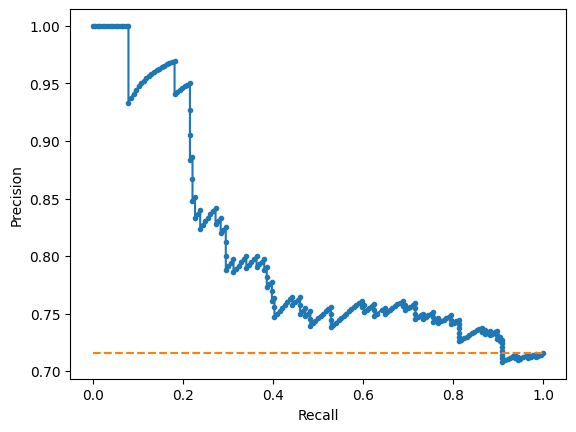

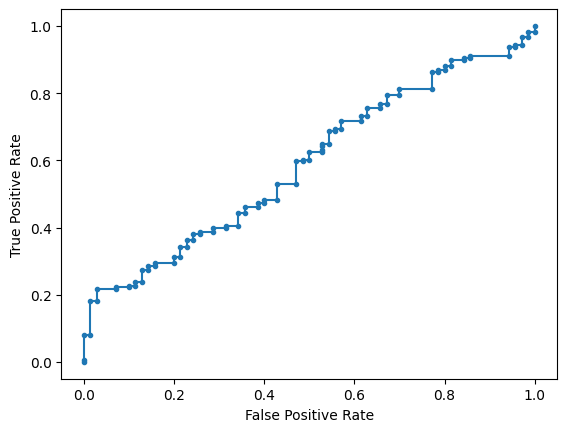

Accuracy: 71.54% Precision: 71.54% Recall: 100.00%
F1: 83.41% MCC: 0.0000
AUPRC: 80.42% AUROC: 59.01%
 accuracy [71.54471544715447]
 precision [71.54471544715447]
 recall [100.0]
 F1 [83.41232227488152]
 MCC [0.0]
 AUPRC [80.42048540393078]
 AUROC [59.00974025974026]

Training # 1 4
2023-04-29 16:18:13.294574
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-2.8098762363690133, -0.08096002795405781]
Variances [2.81814082 1.50226685]
Priors [0.38485098 0.61514902]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 652:318 67.22%
Computed class weights: {0: 1.5251572327044025, 1: 0.7438650306748467}
Valid 1:0 148:90 62.18%
FIT


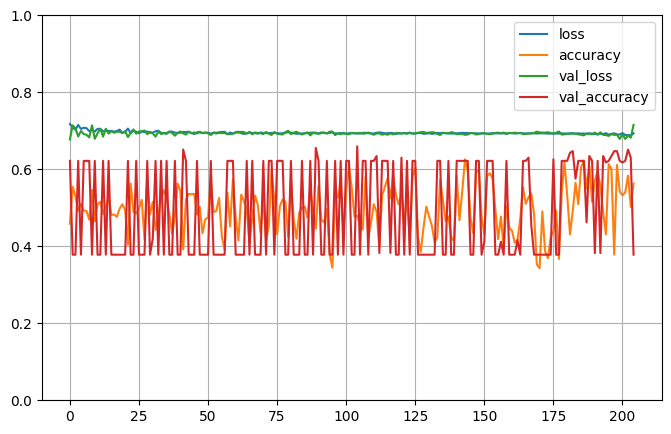


Testing # 1 4
2023-04-29 16:18:57.870588
PREDICT
Test 1:0 148:90 62.18%
Predict 1:0 165:73 69.33%
Test sizes (238, 1025) (238,)
Distrib of scores: 0.5000638 mean 0.00012819582 std
Range of scores: 0.49978903 to 0.5005223
Score threshold 0.5
Confusion matrix
 [[ 41  49]
 [ 32 116]]
Normalized matrix
 [[0.17226891 0.20588235]
 [0.13445378 0.48739496]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


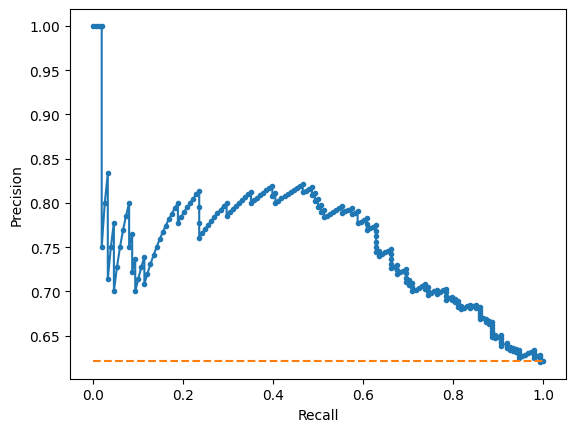

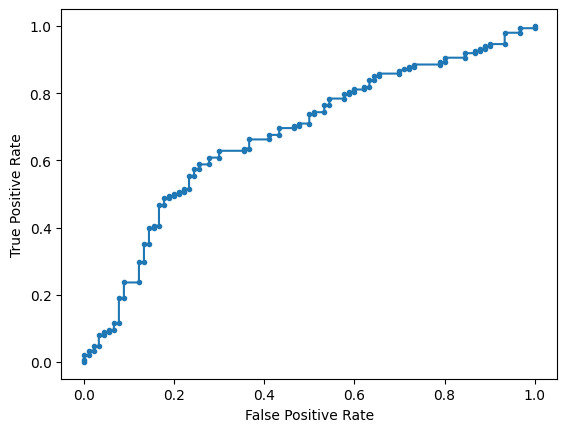

Accuracy: 65.97% Precision: 70.30% Recall: 78.38%
F1: 74.12% MCC: 0.2517
AUPRC: 75.09% AUROC: 67.50%
 accuracy [65.96638655462185]
 precision [70.3030303030303]
 recall [78.37837837837837]
 F1 [74.12140575079871]
 MCC [0.2516881671511789]
 AUPRC [75.09282412429792]
 AUROC [67.50375375375374]

Training # 1 5
2023-04-29 16:18:58.472894
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-2.9524574546280604, -0.20356052585832643]
Variances [2.97470409 1.54419341]
Priors [0.36324988 0.63675012]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 674:305 68.85%
Computed class weights: {0: 1.6049180327868853, 1: 0.7262611275964391}
Valid 1:0 159:70 69.43%
FIT


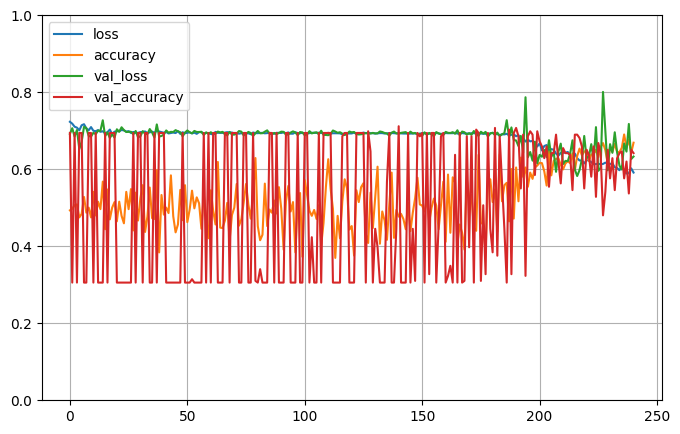


Testing # 1 5
2023-04-29 16:19:44.296150
PREDICT
Test 1:0 159:70 69.43%
Predict 1:0 193:36 84.28%
Test sizes (229, 1025) (229,)
Distrib of scores: 0.50036144 mean 0.00042014252 std
Range of scores: 0.4994259 to 0.5019469
Score threshold 0.5
Confusion matrix
 [[ 20  50]
 [ 16 143]]
Normalized matrix
 [[0.08733624 0.21834061]
 [0.069869   0.62445415]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


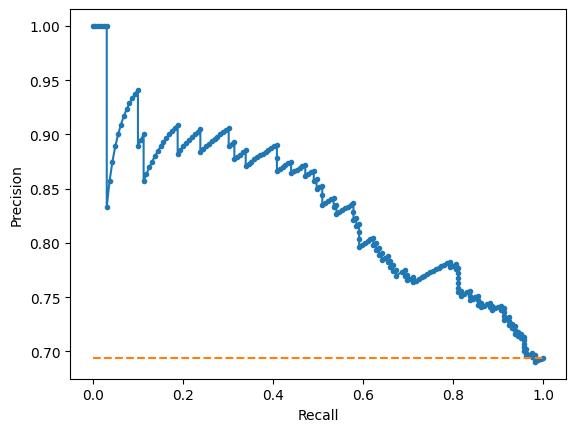

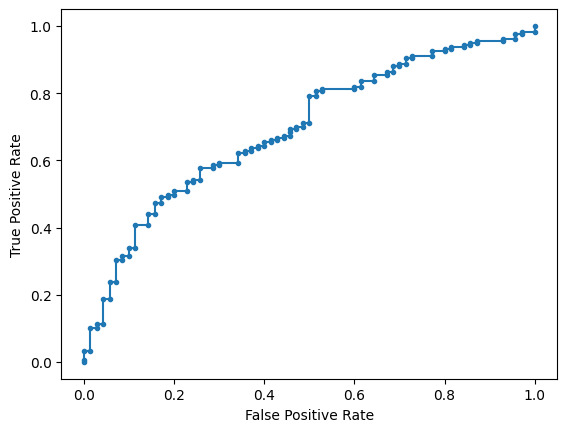

Accuracy: 71.18% Precision: 74.09% Recall: 89.94%
F1: 81.25% MCC: 0.2343
AUPRC: 83.22% AUROC: 69.42%
 accuracy [71.17903930131004]
 precision [74.09326424870466]
 recall [89.937106918239]
 F1 [81.25]
 MCC [0.23425546601390307]
 AUPRC [83.2238960038707]
 AUROC [69.42497753818509]

Training # 2 1
2023-04-29 16:19:44.906777
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-0.18160889343923137, -2.9074235302052576]
Variances [1.64033574 3.19403545]
Priors [0.62786523 0.37213477]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 660:306 68.32%
Computed class weights: {0: 1.5784313725490196, 1: 0.7318181818181818}
Valid 1:0 173:69 71.49%
FIT


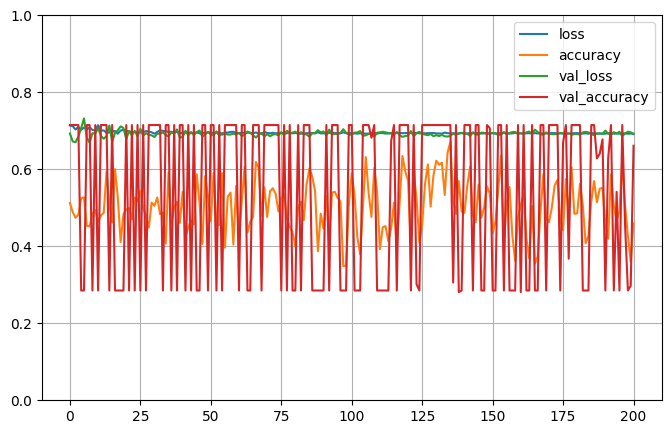


Testing # 2 1
2023-04-29 16:20:27.999895
PREDICT
Test 1:0 173:69 71.49%
Predict 1:0 242:0 100.00%
Test sizes (242, 1025) (242,)
Distrib of scores: 0.5041607 mean 7.692213e-05 std
Range of scores: 0.50400203 to 0.50444895
Score threshold 0.5
Confusion matrix
 [[  0  69]
 [  0 173]]
Normalized matrix
 [[0.         0.28512397]
 [0.         0.71487603]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


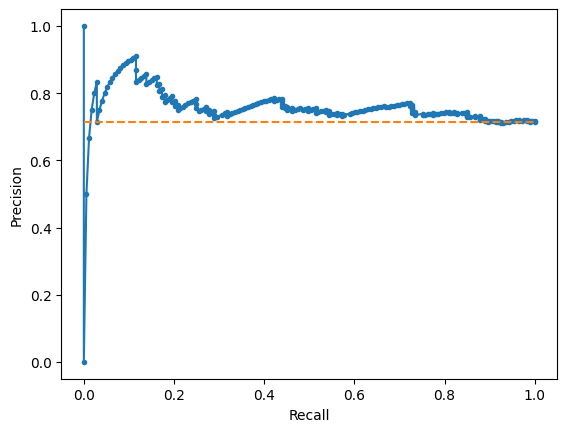

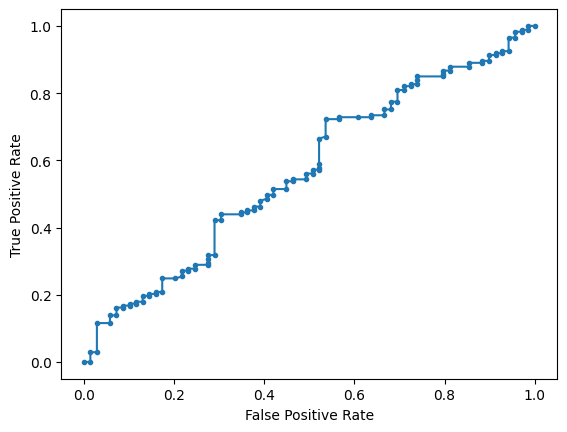

Accuracy: 71.49% Precision: 71.49% Recall: 100.00%
F1: 83.37% MCC: 0.0000
AUPRC: 75.73% AUROC: 56.84%
 accuracy [71.48760330578511]
 precision [71.48760330578511]
 recall [100.0]
 F1 [83.37349397590361]
 MCC [0.0]
 AUPRC [75.72815006258409]
 AUROC [56.84426572840747]

Training # 2 2
2023-04-29 16:20:28.645836
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.7805593652034477, -0.133956512634008]
Variances [2.96291922 1.51797813]
Priors [0.39092838 0.60907162]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 638:319 66.67%
Computed class weights: {0: 1.5, 1: 0.75}
Valid 1:0 169:82 67.33%
FIT


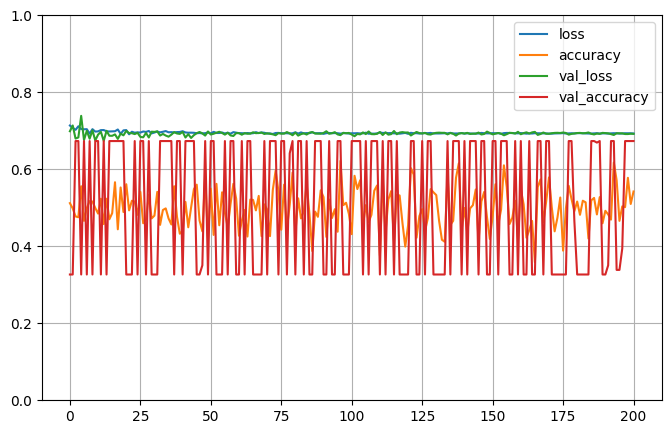


Testing # 2 2
2023-04-29 16:21:11.732801
PREDICT
Test 1:0 169:82 67.33%
Predict 1:0 251:0 100.00%
Test sizes (251, 1025) (251,)
Distrib of scores: 0.5045784 mean 6.441793e-05 std
Range of scores: 0.5044141 to 0.50478584
Score threshold 0.5
Confusion matrix
 [[  0  82]
 [  0 169]]
Normalized matrix
 [[0.         0.32669323]
 [0.         0.67330677]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


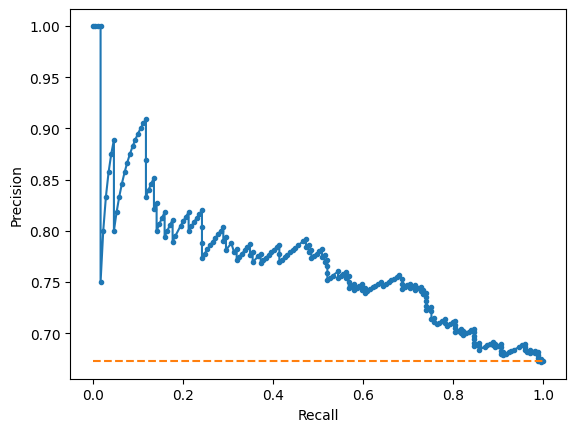

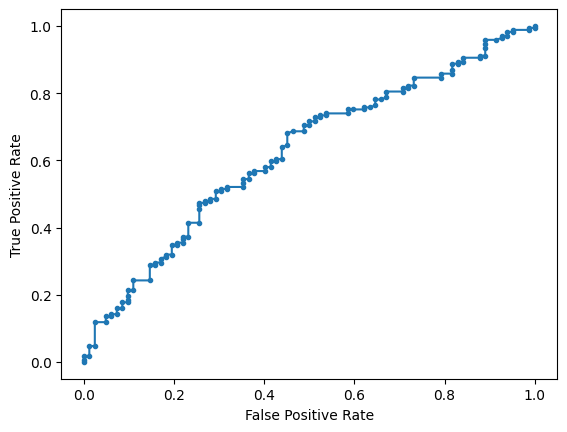

Accuracy: 67.33% Precision: 67.33% Recall: 100.00%
F1: 80.48% MCC: 0.0000
AUPRC: 76.71% AUROC: 62.32%
 accuracy [67.33067729083665]
 precision [67.33067729083665]
 recall [100.0]
 F1 [80.47619047619048]
 MCC [0.0]
 AUPRC [76.70501368035656]
 AUROC [62.31779477558089]

Training # 2 3
2023-04-29 16:21:12.306324
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-0.2817729360760671, -3.1004569912049424]
Variances [1.63637326 3.34969714]
Priors [0.66556493 0.33443507]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Train 1:0 706:276 71.89%
Computed class weights: {0: 1.7789855072463767, 1: 0.6954674220963173}
Valid 1:0 163:63 72.12%
FIT


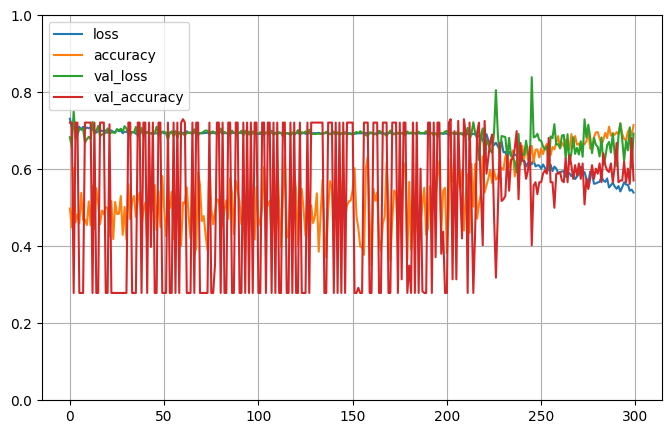


Testing # 2 3
2023-04-29 16:22:39.805849
PREDICT
Test 1:0 163:63 72.12%
Predict 1:0 112:114 49.56%
Test sizes (226, 1025) (226,)
Distrib of scores: 0.5241177 mean 0.22375567 std
Range of scores: 0.10127729 to 0.96914065
Score threshold 0.5
Confusion matrix
 [[40 23]
 [74 89]]
Normalized matrix
 [[0.17699115 0.10176991]
 [0.32743363 0.39380531]]
Extreme scores correct, pos:neg 58 24
Extreme scores incorrect pos:neg 13 37


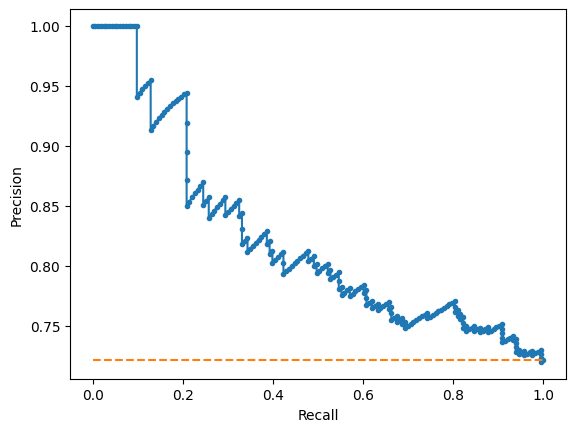

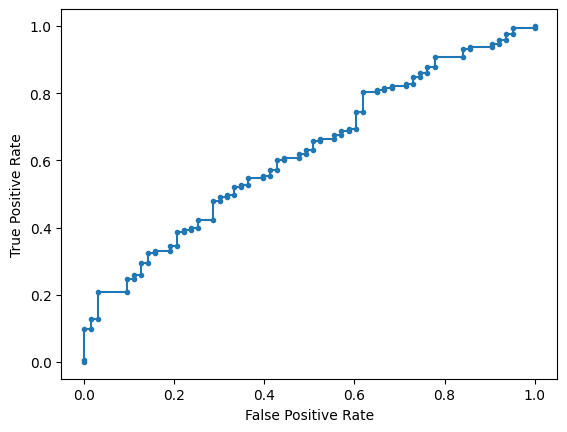

Accuracy: 57.08% Precision: 79.46% Recall: 54.60%
F1: 64.73% MCC: 0.1623
AUPRC: 82.21% AUROC: 62.41%
 accuracy [57.07964601769911]
 precision [79.46428571428571]
 recall [54.601226993865026]
 F1 [64.72727272727272]
 MCC [0.1622632595027036]
 AUPRC [82.21043838926371]
 AUROC [62.411140325250756]

Training # 2 4
2023-04-29 16:22:40.413598
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-2.8640573547577897, -0.11500841734930109]
Variances [3.23806205 1.59499628]
Priors [0.37677169 0.62322831]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 663:295 69.21%
Computed class weights: {0: 1.623728813559322, 1: 0.722473604826546}
Valid 1:0 163:87 65.20%
FIT


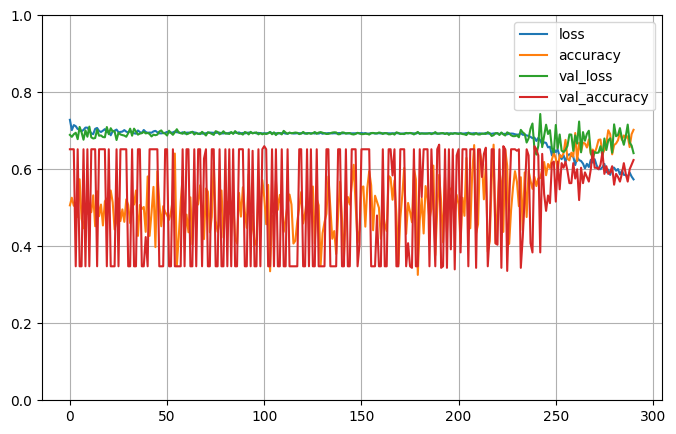


Testing # 2 4
2023-04-29 16:23:36.368120
PREDICT
Test 1:0 163:87 65.20%
Predict 1:0 245:5 98.00%
Test sizes (250, 1025) (250,)
Distrib of scores: 0.50061864 mean 0.0003166599 std
Range of scores: 0.4998876 to 0.5018668
Score threshold 0.5
Confusion matrix
 [[  4  83]
 [  1 162]]
Normalized matrix
 [[0.016 0.332]
 [0.004 0.648]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


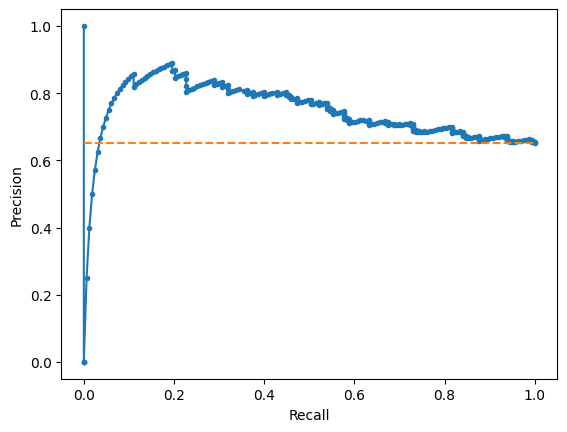

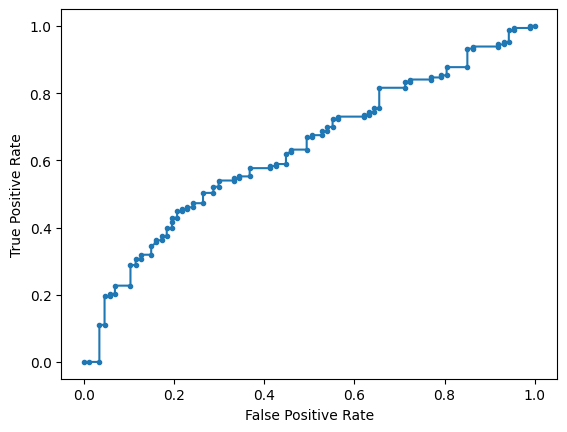

Accuracy: 66.40% Precision: 66.12% Recall: 99.39%
F1: 79.41% MCC: 0.1356
AUPRC: 74.36% AUROC: 63.06%
 accuracy [66.4]
 precision [66.12244897959184]
 recall [99.38650306748467]
 F1 [79.41176470588238]
 MCC [0.13555856878807176]
 AUPRC [74.36434717966891]
 AUROC [63.05972780480925]

Training # 2 5
2023-04-29 16:23:36.941121
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.19783711171348478, -2.9392056588099194]
Variances [1.56625745 3.0563776 ]
Priors [0.63117726 0.36882274]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 666:303 68.73%
Computed class weights: {0: 1.599009900990099, 1: 0.7274774774774775}
Valid 1:0 167:72 69.87%
FIT


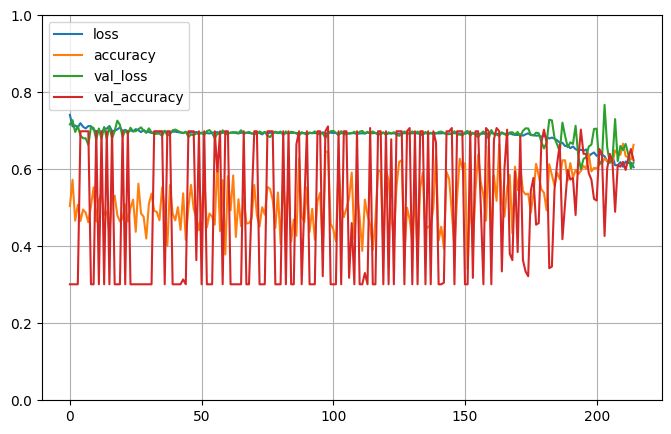


Testing # 2 5
2023-04-29 16:24:20.066857
PREDICT
Test 1:0 167:72 69.87%
Predict 1:0 229:10 95.82%
Test sizes (239, 1025) (239,)
Distrib of scores: 0.5004505 mean 0.00031125196 std
Range of scores: 0.49969903 to 0.50155735
Score threshold 0.5
Confusion matrix
 [[  6  66]
 [  4 163]]
Normalized matrix
 [[0.0251046  0.27615063]
 [0.0167364  0.68200837]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


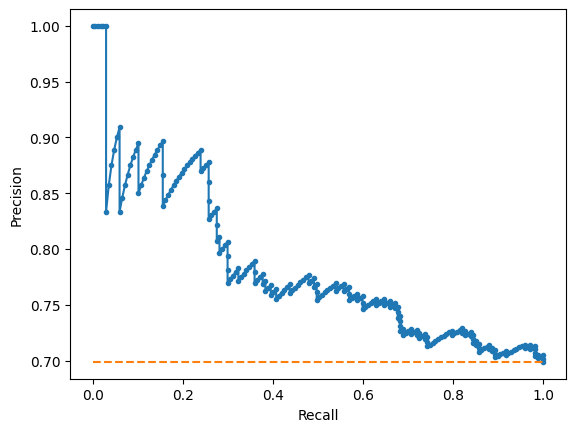

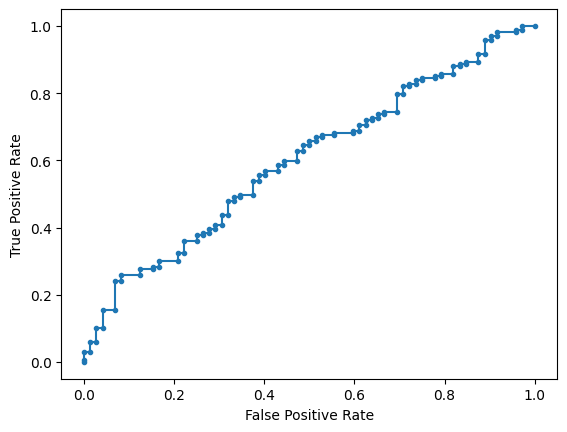

Accuracy: 70.71% Precision: 71.18% Recall: 97.60%
F1: 82.32% MCC: 0.1361
AUPRC: 78.24% AUROC: 60.00%
 accuracy [70.7112970711297]
 precision [71.17903930131004]
 recall [97.60479041916167]
 F1 [82.32323232323232]
 MCC [0.13606799544899773]
 AUPRC [78.24248948692242]
 AUROC [59.996673320026616]
2023-04-29 16:24:20.697779


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 68.50% std 4.65
 precision mean 71.45% std 3.64
 recall mean 91.99% std 14.89
 F1 mean 79.59% std 5.96
 MCC mean 0.1090 std 0.1009
 AUPRC mean 78.24% std 3.50
 AUROC mean 62.16% std 4.66
 accuracy [[72.51908396946564], [70.81545064377683], [71.54471544715447], [65.96638655462185], [71.17903930131004], [71.48760330578511], [67.33067729083665], [57.07964601769911], [66.4], [70.7112970711297]]
 precision [[72.2007722007722], [70.81545064377683], [71.54471544715447], [70.3030303030303], [74.09326424870466], [71.48760330578511], [67.33067729083665], [79.46428571428571], [66.12244897959184], [71.17903930131004]]
 recall [[100.0], [100.0], [100.0], [78.37837837837837], [89.937106918239], [100.0], [100.0], [54.601226993865026], [99.38650306748467], [97.60479041916167]]
 F1 [[83.85650224215246], [82.91457286432161], [83.41232227488152], [74.12140575079871], [81.25], [83.37349397590361], [80.47619047619048], [64.72727272727272], [79.41176470588238], [82.32323232323232]]
 MCC [[0.1